### Importing main libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from newsplease import NewsPlease
from sklearn.svm import OneClassSVM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

### Importing Train and Test dataframes

In [2]:
#Calling train and tests datasets
X_train = pd.read_csv("X_train.csv").set_index('Unnamed: 0')
y_train = pd.read_csv("y_train.csv").set_index('Unnamed: 0')
X_test = pd.read_csv("X_test.csv").set_index('Unnamed: 0')
y_test = pd.read_csv("y_test.csv").set_index('Unnamed: 0')
vocabulario = pd.read_csv("vocabulario.csv").set_index('Unnamed: 0').iloc[:,0].tolist()

#Calling the stopwords following the desired language
stop_words = set(stopwords.words('portuguese'))

#Calling the tokenizer to extract only words
tokenizer = RegexpTokenizer(r'\w+')

#up_noticia = pd.read_csv("noticia.csv", encoding='ISO-8859-1')
#noticia_teste = up_noticia.columns.tolist()[0]

### Using One-Class SVM

[LibSVM]              precision    recall  f1-score   support

          -1       0.67      0.40      0.50        40
           1       0.57      0.80      0.67        40

    accuracy                           0.60        80
   macro avg       0.62      0.60      0.58        80
weighted avg       0.62      0.60      0.58        80

AxesSubplot(0.125,0.125;0.62x0.755)


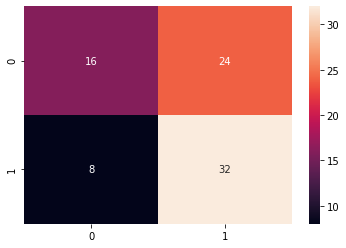

In [3]:
model = OneClassSVM(gamma='auto', nu = 0.3, verbose = True)
model.fit(X_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test,y_pred), annot=True))

### Receiving a url and preparing for model

In [4]:
#Calling noticia teste
link = 'https://revistaoeste.com/brasil/coronavirus-brasil/tratamento-precoce-dois-mil-medicos-apoiam-terapeutica/'

def news_please(news_link):
    news = NewsPlease.from_url(news_link)
    news_text = news.maintext.replace('\n',' ')
    return news_text

In [8]:
print(vec_news(news_please('https://revistaoeste.com/brasil/coronavirus-brasil/tratamento-precoce-dois-mil-medicos-apoiam-terapeutica/')))

  vacinação toda população quilombola pautas debatidas abrasco desde começo  \
0         0    0         0          0      0         0       0     0      0   

  pandemia  ... adotei bora preferível gold frontline doctors maca reale  \
0        0  ...      0    0          0    0         0       0    0     0   

  jonestown luix  
0         0    0  

[1 rows x 23606 columns]


### Vectorizing Data Entry

In [6]:
def vec_news(noticia):
    #Tokenizing and removing stopwords for news entry
    token_1 = tokenizer.tokenize(noticia)
    token_2 = [word.lower() for word in token_1 if word not in stop_words]
    text_join = " ".join(token_2)
    tokenized_news_join = list()
    tokenized_news_join.append(text_join)
    
    #Vectorizing news entry (already tokenized)
    count_vec = CountVectorizer(vocabulary= vocabulario)
    count_vec_news = count_vec.fit_transform(tokenized_news_join)
    
    #transforming vectorized news entry in dataframe
    news_df = pd.DataFrame(columns = vocabulario)
    news_list = list()
    values = count_vec_news[0].toarray()[0]
    zipped = zip(vocabulario, values)
    df_dic = dict(zipped)
  
    news_list.append(df_dic)
    noticia_tratada = news_df.append(news_list)
        
    return noticia_tratada

### Predicting

In [5]:
def predict_news(noticia_tratada):
    prediction = model.predict(noticia_tratada)
    if prediction == 1:
        print('Essa notícia parece ser confiável.')
    elif prediction == -1:
        print('Essa notícia parece ser suspeita. Cheque a fonte!')

In [16]:
vec_news(news_please(link))

,vacinação,toda,população,quilombola,pautas,debatidas,abrasco,desde,começo,pandemia,...,adotei,bora,preferível,gold,frontline,doctors,maca,reale,jonestown,luix
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
predict_news(vec_news(news_please(link)))

Essa notícia parece ser confiável.
